In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pycocotools.coco import COCO

from torch.utils.data import DataLoader
from pathlib import Path

from utils.config import LINEAR_ENCODER

from patches_dataset import PatchesDataset

import warnings
warnings.filterwarnings("ignore")

Global seed set to 16


In [8]:
# Root path
root_path_coco = Path('coco_files/') # Prefix path to coco files
root_path_netcdf = Path('D:/S4-Data/netcdf/')  # Path to the netCDF files

# Path to coco file
coco_train = COCO(root_path_coco / 'coco_example.json')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [9]:
print(list(sorted(coco_train.imgs.keys())))

[1]


In [10]:
# Dataset parameters
group_freq = '1MS'
prefix = 'pre_alpha_tests'
bands = sorted(['B02', 'B03', 'B04'])
saved_medians = False # Toggle True to trade storage for loading time
window_len = 6
requires_norm = False
return_masks = False
clouds = False
cirrus = False
shadow = False
snow = False
output_size = (183, 183) # Return sub-patches of 183x183 size

In [11]:
# Create dataset instances
dataset_train = PatchesDataset(root_path_netcdf=root_path_netcdf,
                               coco=coco_train,
                               group_freq=group_freq,
                               prefix=prefix,
                               bands=bands,
                               linear_encoder=LINEAR_ENCODER,
                               saved_medians=saved_medians,
                               window_len=window_len,
                               requires_norm=requires_norm,
                               return_masks=return_masks,
                               clouds=clouds,
                               cirrus=cirrus,
                               shadow=shadow,
                               snow=snow,
                               output_size=output_size
                              )

In [12]:
batch_size = 1
num_workers = 8

# Create dataloader instances
dataloader_train = DataLoader(dataset_train,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=num_workers,
                              pin_memory=True
                             )

In [13]:
batch = next(iter(dataloader_train))

print(type(batch))
print(f'batch contains: {list(batch.keys())}')

medians = batch['medians']
print(f'medians: {medians.shape}')

labels = batch['labels']
print(f'labels: {labels.shape}')

<class 'dict'>
batch contains: ['medians', 'labels', 'idx']
medians: torch.Size([1, 6, 3, 183, 183])
labels: torch.Size([1, 183, 183])


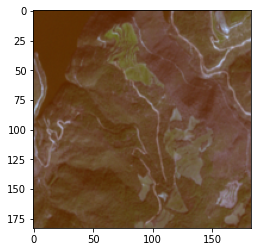

In [14]:
# Plot a subpatch
img = medians.cpu().detach().numpy()
img = img[0, 0]

img = img.transpose(1, 2, 0)

# Using current max, min for normalizing from [0, 1k] -> [0, 1]
# cause dividing by 1k, makes the image dark
img = (img - img.min()) * (1 / (img.max() - img.min()))

plt.imshow(img)
plt.show()

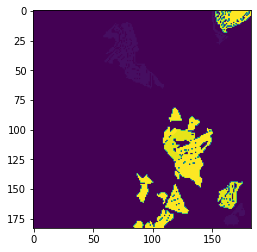

In [15]:
# And the labels
img = labels.cpu().detach().numpy()
img = img[0]

# Using current max, min for normalizing from [0, 1k] -> [0, 1]
# cause dividing by 1k, makes the image dark
img = (img - img.min()) * (1 / (img.max() - img.min()))

plt.imshow(img)
plt.show()